# DataCamp - Data Scientist Career Track (Python)

##   Analyzing Police Activity with pandas                


In [1]:
data_folder = "C:/Users/Admin/Dropbox/Python/ficheiros/DataCamp/DataCamp - Analyzing Police Activity with pandas/"

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

website com os dados para todos os estados: https://openpolicing.stanford.edu

##    CHAPTER 1  - Preparing the data for analysis


#### Exercício 1 - Stanford Open Policing Project dataset

In [3]:
#vídeo

# Introduction to the dataset
#  ---> Traffic stops by police officers
#  ---> Download data for any state: https://openpolicing.stanford.edu

# Preparing the data
#   Examine the data
#   Clean the data
import pandas as pd
ri = pd.read_csv(data_folder + "police.csv")
ri.head()

# Each row represents one traffic stop
# NaN indicates a missing value

# Locating missing values
ri.isnull()
ri.isnull().sum()

# Dropping a column
#   county_name column only contains missing values
#   Drop county_name using the drop() method
ri.drop('county_name', axis='columns', inplace=True)

# Dropping rows
#   dropna(): Drop rows based on the presence of missing values
ri.dropna(subset=['stop_date', 'stop_time'], inplace=True)

ri.head()

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


Exercício 2

In [4]:
# Examining the dataset

# Import the pandas library as pd
import pandas as pd

# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv(data_folder + 'police.csv')

# Examine the head of the DataFrame
ri.head()

# Count the number of missing values in each column
print(ri.isnull().sum())

ri.head()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64


,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


Exercício 3

In [5]:
# Dropping columns

# Count the number of missing values in each column
print(ri.isnull().sum())

# Examine the shape of the DataFrame
print(ri.shape)

# Drop the 'county_name' and 'state' columns
ri.drop(['county_name', 'state'], axis='columns', inplace=True)

# Examine the shape of the DataFrame (again)
ri.shape

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64
(91741, 15)


(91741, 13)

Exercício 4

In [6]:
# Dropping rows

# Count the number of missing values in each column
print(ri.isnull().sum())

# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)

# Count the number of missing values in each column (again)
print(ri.isnull().sum())

# Examine the shape of the DataFrame
ri.shape

stop_date                 0
stop_time                 0
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64
stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64


(86536, 13)

#### Exercício 5 - Using proper data types

In [7]:
#vídeo

ri.dtypes

# object: Python strings (or other Python objects)
# bool: True and False values
# Other types: int, float, datetime, category

# Why do data types matter?
# Affects which operations you can perform
# Avoid storing data as strings (when possible)
# int, float: enables mathematical operations
# datetime: enables date-based attributes and methods
# category: uses less memory and runs faster
# bool: enables logical and mathematical operations

# Fixing a data type

# example - apple
# apple.price.dtype
# ---> dtype('O')
# apple['price'] = apple.price.astype('float')
# apple.price.dtype
# ---> dtype('float64')

# Dot notation: apple.price
# Bracket notation: apple['price']
# Must be used on the left side of an assignment statement


stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

Exercício 6

In [8]:
# Finding an incorrect data type

# The dtypes attribute of the ri DataFrame has been printed for you. Your task is to explore the ri DataFrame 
# to determine which column's data type should be changed.

print(ri.dtypes)

print("\nis_arrested should have a data type of bool")

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

is_arrested should have a data type of bool


Exercício 7

In [9]:
# Fixing a data type

# Examine the head of the 'is_arrested' column
print(ri.is_arrested.head())

# Check the data type of 'is_arrested'
print(ri.is_arrested.dtype)

# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype('bool')

# Check the data type of 'is_arrested' (again)
print(ri['is_arrested'].dtype)


0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object
object
bool


#### Exercício 8 - Creating a DatetimeIndex

In [10]:
%%script false
#vídeo

ri.head()
ri.dtypes

# 1. Combine stop_date and stop_time into one column
# 2. Convert it to datetime format

# Combining object columns
apple['date'].str.replace('/', '-')

combined = apple['date'].str.cat(apple.time, sep=' ')
combined
# 2/13/18 16:00

# Converting to datetime format
apple['date_and_time'] = pd.to_datetime(combined)

# Setting the index
apple.set_index('date_and_time', inplace=True)


Couldn't find program: 'false'


Exercício 9

In [11]:
# Combining object columns

# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri['stop_date'].str.cat(ri['stop_time'], sep=' ')

# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

# Examine the data types of the DataFrame
print(ri.dtypes)

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object


Exercício 10

In [12]:
# Setting the index

# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)

# Examine the index
print(ri.index)

# Examine the columns
ri.columns

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86536, freq=None)


Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')

# CHAPTER 2 - Exploring the relationship between gender and policing


#### Exercício 1 - Do the genders commit different violations?

In [13]:
#vídeo

# Counting unique values
#  - value_counts(): Counts the unique values in a Series
#  - Best suited for categorical data

ri.stop_outcome.value_counts()

ri.stop_outcome.value_counts().sum()

# Expressing counts as proportions
ri.stop_outcome.value_counts(normalize=True)

# Filtering DataFrame rows
white = ri[ri.driver_race == 'White']
asian = ri[ri.driver_race == 'Asian']

# Comparing stop outcomes for two groups
white.stop_outcome.value_counts(normalize=True)
asian.stop_outcome.value_counts(normalize=True)


Citation            0.922980
Warning             0.045207
Arrest Driver       0.017581
No Action           0.008372
N/D                 0.004186
Arrest Passenger    0.001674
Name: stop_outcome, dtype: float64

Exercício 2

In [14]:
# Examining traffic violations

# Count the unique values in 'violation'
print(ri['violation'].value_counts(), "\n")

# Express the counts as proportions
print(ri['violation'].value_counts(normalize=True))


Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64 

Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64


Exercício 3

In [15]:
# Comparing violations by gender

# Create a DataFrame of female drivers
female = ri[ri['driver_gender'] == 'F']

# Create a DataFrame of male drivers
male = ri[ri['driver_gender'] == 'M']

# Compute the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize=True), "\n")

# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize=True))


Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64 

Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


#### Exercício 4 - Does gender affect who gets a ticket for speeding?

In [16]:
#vídeo

# Filtering by multiple conditions (1)
female = ri[ri.driver_gender == 'F']
female_and_arrested = ri[(ri.driver_gender == 'F') & (ri.is_arrested == True)]

# Each condition is surrounded by parentheses
# Ampersand (&) represents the and operator
# Only includes female drivers who were arrested

female_and_arrested.shape

# Filtering by multiple conditions (2)
female_or_arrested = ri[(ri.driver_gender == 'F') | (ri.is_arrested == True)]

# Pipe (|) represents the or operator
# Includes all females
# Includes all drivers who were arrested

# Rules for filtering by multiple conditions
#   Ampersand (&): only include rows that satisfy both conditions
#   Pipe (|): include rows that satisfy either condition
#   Each condition must be surrounded by parentheses
#   Conditions can check for equality (==), inequality (!=), etc.
#   Can use more than two conditions

# Correlation, not causation
#   Analyze the relationship between gender and stop outcome
#    Assess whether there is a correlation
# Not going to draw any conclusions about causation
#   Would need additional data and expertise
#    Exploring relationships only


Exercício 5

In [17]:
# Filtering by multiple conditions

# Which one of these commands would filter the ri DataFrame to only include female drivers who were stopped for a speeding
# violation?

ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')].head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
2005-03-14 10:00:00,2005-03-14,10:00,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-07-14 11:20:00,2005-07-14,11:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-07-18 19:30:00,2005-07-18,19:30,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-07-24 20:10:00,2005-07-24,20:10,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3


Exercício 6

In [18]:
# Comparing speeding outcomes by gender

# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender == 'M') & (ri.violation == 'Speeding')]

# Compute the stop outcomes for female drivers (as proportions)
print("Female:\n", female_and_speeding.stop_outcome.value_counts(normalize=True), "\n")

# Compute the stop outcomes for male drivers (as proportions)
print("Male:\n", male_and_speeding.stop_outcome.value_counts(normalize=True))


Female:
 Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64 

Male:
 Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


#### Exercício 7 - Does gender affect whose vehicle is searched?

In [19]:
#vídeo

# Math with Boolean values
ri.isnull().sum()

import numpy as np
np.mean([0, 1, 0, 0]) == np.mean([False, True, False, False])

# Taking the mean of a Boolean Series
ri.is_arrested.value_counts(normalize=True)
ri.is_arrested.mean()
ri.is_arrested.dtype

# Comparing groups using groupby
#   Study the arrest rate by police district
print(ri.district.unique(), "\n")

print(ri[ri.district == 'Zone K1'].is_arrested.mean())

ri.groupby('district').is_arrested.mean()

# Grouping by multiple categories
ri.groupby(['district', 'driver_gender']).is_arrested.mean()
ri.groupby(['driver_gender', 'district']).is_arrested.mean()


['Zone X4' 'Zone K3' 'Zone X1' 'Zone X3' 'Zone K1' 'Zone K2'] 

0.024349083895853423


driver_gender  district
F              Zone K1     0.019169
               Zone K2     0.022196
               Zone K3     0.025156
               Zone X1     0.019646
               Zone X3     0.027188
               Zone X4     0.042149
M              Zone K1     0.026588
               Zone K2     0.034285
               Zone K3     0.034961
               Zone X1     0.024563
               Zone X3     0.038166
               Zone X4     0.049956
Name: is_arrested, dtype: float64

Exercício 8

In [20]:
# Calculating the search rate

# Check the data type of 'search_conducted'
print(ri.search_conducted.dtype, "\n")

# Calculate the search rate by counting the values
print(ri.search_conducted.value_counts(normalize=True), "\n")

# Calculate the search rate by taking the mean
print(ri.search_conducted.mean())

bool 

False    0.961785
True     0.038215
Name: search_conducted, dtype: float64 

0.0382153092354627


Exercício 9

In [21]:
# Comparing search rates by gender

# Calculate the search rate for female drivers
print(ri[ri.driver_gender == 'F'].search_conducted.mean())

# Calculate the search rate for male drivers
print(ri[ri.driver_gender == 'M'].search_conducted.mean(), "\n")

# Calculate the search rate for both groups simultaneously
print(ri.groupby('driver_gender').search_conducted.mean())

0.019180617481282074
0.04542557598546892 

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


Exercício 10

In [22]:
# Adding a second factor to the analysis

# Calculate the search rate for each combination of gender and violation
print(ri.groupby(['driver_gender', 'violation']).search_conducted.mean(), "\n")

# Reverse the ordering to group by violation before gender
print(ri.groupby(['violation', 'driver_gender']).search_conducted.mean(), "\n")

print("For all types of violations, the search rate is higher for males than for females")

driver_gender  violation          
F              Equipment              0.039984
               Moving violation       0.039257
               Other                  0.041018
               Registration/plates    0.054924
               Seat belt              0.017301
               Speeding               0.008309
M              Equipment              0.071496
               Moving violation       0.061524
               Other                  0.046191
               Registration/plates    0.108802
               Seat belt              0.035119
               Speeding               0.027885
Name: search_conducted, dtype: float64 

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054

#### Exercício 11 - Does gender affect who is frisked during a search?

In [23]:
#vídeo

# Examining the search types (1)
print(ri.search_conducted.value_counts(), "\n")
print(ri.search_type.value_counts(dropna=False).head(), "\n")

# value_counts() excludes missing values by default
# dropna=False displays missing values

print(ri.search_type.value_counts().head())

# Multiple values are separated by commas
# 219 searches in which "Inventory" was the only search type
# Locate "Inventory" among multiple search types

# Searching for a string
ri['inventory'] = ri.search_type.str.contains('Inventory', na=False)

# str.contains() returns True if string is found, False if not found
# na=False returns False when it finds a missing value

ri.inventory.dtype
ri.inventory.sum()

# Calculating the inventory rate
print("\n{} of all traffic stops resulted in an inventory".format(ri.inventory.mean()))

searched = ri[ri.search_conducted == True]
searched.inventory.mean()

False    83229
True      3307
Name: search_conducted, dtype: int64 

NaN                     83229
Incident to Arrest       1290
Probable Cause            924
Inventory                 219
Reasonable Suspicion      214
Name: search_type, dtype: int64 

Incident to Arrest      1290
Probable Cause           924
Inventory                219
Reasonable Suspicion     214
Protective Frisk         164
Name: search_type, dtype: int64

0.0050961449570121106 of all traffic stops resulted in an inventory


0.13335349259147264

Exercício 12

In [24]:
# Counting protective frisks

# Count the 'search_type' values
print(ri.search_type.value_counts(), "\n")

# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)
                                                            # na=False returns False when it finds a missing value

# Check the data type of 'frisk'
print(ri['frisk'].dtype, "\n")

# Take the sum of 'frisk'
print("sum of 'Protective Frisk':", ri['frisk'].sum())


Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Probable Cause,Protective Frisk                               35
Incident to Arrest,Inventory,Probable Cause                   35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

Exercício 13

In [25]:
# Comparing frisk rates by gender

# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean(), "\n")

# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender').frisk.mean())

print("""\nThe frisk rate is higher for males than for females, though we can't conclude that this difference is caused by 
the driver's gender""")

0.09162382824312065 

driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64

The frisk rate is higher for males than for females, though we can't conclude that this difference is caused by 
the driver's gender


# Chapter 3 - Visual exploratory data analysis

#### Exercício 1 - Does time of day affect arrest rate?

In [26]:
%%script false
#vídeo

# Accessing datetime attributes (1)
apple
apple.dtypes
apple['date_and_time'].dt.month

# Accessing datetime attributes (2)
apple.set_index('date_and_time', inplace=True)
apple.index
apple.index.month

# dt accessor is not used with a DatetimeIndex

# Calculating the monthly mean price
apple.price.mean()

# Plotting the monthly mean price
monthly_price.plot()

# Line plot: Series index on x-axis, Series values on y-axis
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Monthly mean stock price for Apple')
plt.show()


Couldn't find program: 'false'


Exercício 2

In [27]:
# Calculating the hourly arrest rate

# Calculate the overall arrest rate
print(ri.is_arrested.mean(), "\n")

# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()


0.0355690117407784 

stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


Exercício 3

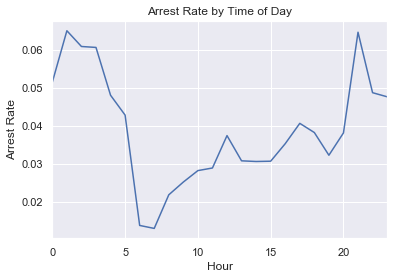

In [28]:
# Plotting the hourly arrest rate

# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

#### Exercício 4 - Are drug-related stops on the rise?

In [29]:
%%script false
#vídeo

# Resampling the price
apple
apple.groupby(apple.index.month).price.mean()
apple.price.resample('M').mean()


# Resampling the volume
apple.volume.resample('M').mean()

# Concatenating price and volume
monthly_price = apple.price.resample('M').mean()
monthly_volume = apple.volume.resample('M').mean()

monthly = pd.concat([monthly_price, monthly_volume], axis='columns')

#####################################

# Plotting price and volume (1)
monthly.plot()
plt.show()

# Plotting price and volume (2)
monthly.plot(subplots=True)
plt.show()


Couldn't find program: 'false'


Exercício 5

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64 



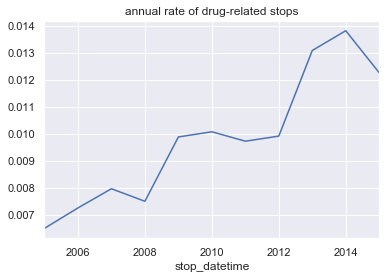

In [30]:
# Plotting drug-related stops

# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean(), "\n")

# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.title("annual rate of drug-related stops")
plt.show()


Exercício 6

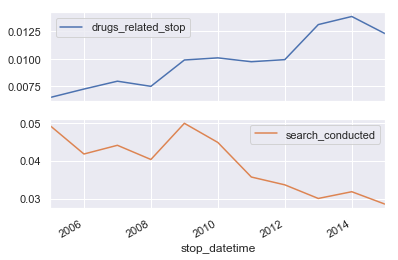

The rate of drug-related stops increased even though the search rate decreased


In [31]:
# Comparing drug and search rates

# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate ,annual_search_rate], axis=1)

# Create subplots from 'annual'
annual.plot(subplots=True)

# Display the subplots
plt.show()

print("The rate of drug-related stops increased even though the search rate decreased")

#### Exercício 7 - What violations are caught in each district?

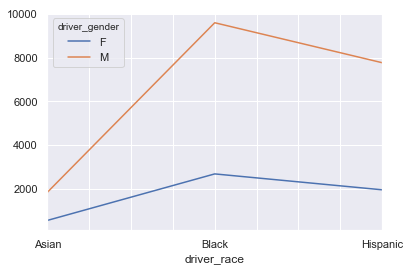

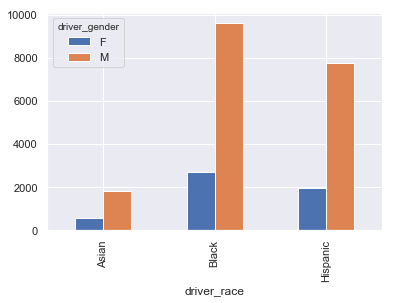

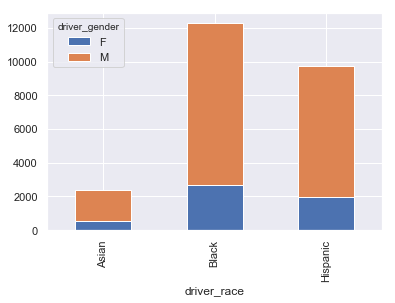

In [32]:
#vídeo

# Computing a frequency table
pd.crosstab(ri.driver_race, ri.driver_gender)

# Frequency table: Tally of how many times each combination of values occurs
ri[(ri.driver_race == 'Asian') & (ri.driver_gender == 'F')].shape

# driver_race is along the index, driver_gender is along the columns
table = pd.crosstab(ri.driver_race, ri.driver_gender)

# Selecting a DataFrame slice
# loc accessor: Select from a DataFrame by label
table = table.loc['Asian':'Hispanic']
table

# Creating a line plot
table.plot()
plt.show()

# Creating a bar plot
table.plot(kind='bar')
plt.show()

# Stacking the bars
table.plot(kind='bar', stacked=True)
plt.show()

Exercício 8

In [33]:
# Tallying violations by district

# Create a frequency table of districts and violations
pd.crosstab(ri.district, ri.violation)

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district, ri.violation)

# Select rows 'Zone K1' through 'Zone K3'
all_zones.loc['Zone K1':'Zone K3']

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

all_zones
k_zones

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322


Exercício 9

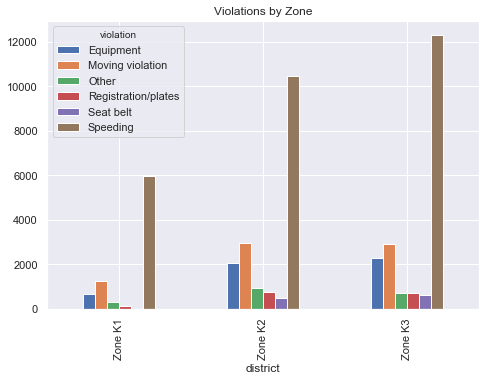

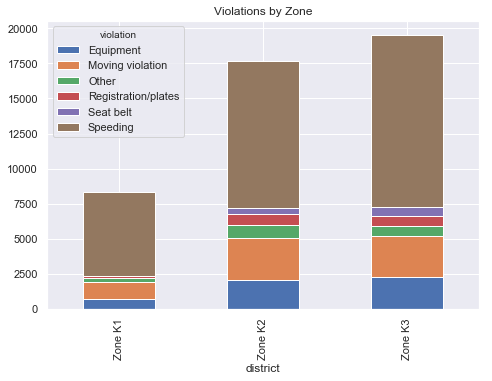

The vast majority of traffic stops in Zone K1 are for speeding, and Zones K2 and K3 are remarkably similar to one
another in terms of violations.


In [34]:
# Plotting violations by district

# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')
plt.title("Violations by Zone")

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar', stacked=True)
plt.title("Violations by Zone")

# Display the plot
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

print("""The vast majority of traffic stops in Zone K1 are for speeding, and Zones K2 and K3 are remarkably similar to one
another in terms of violations.""")

#### Exercício 10 - How long might you be stopped for a violation?

In [35]:
%%script false
#vídeo

# Analyzing an object column
apple

# Create a Boolean column: True if the price went up, and False otherwise
# Calculate how often the price went up by taking the column mean
apple['change'].dtype
dtype('O')
# astype() can't be used in this case

# Mapping one set of values to another
# Dictionary maps the values you have to the values you want
mapping = {'up': True, 'down': False}

apple['is_up'] = apple['change'].map(mapping)

apple.is_up.mean()

# Calculating the search rate
# Visualize how often searches were performed after each type of violation
ri.groupby('violation').search_conducted.mean()

# Returns a Series sorted in alphabetical order
search_rate = ri.groupby('violation').search_conducted.mean()

# Creating a bar plot
search_rate.plot(kind='bar')
plt.show()

# Order the bars from left to right by size
search_rate.sort_values().plot(kind='bar')
plt.show()

# Rotating the bars
search_rate.sort_values().plot(kind='barh')
plt.show()


Couldn't find program: 'false'


Exercício 11

In [36]:
# Converting stop durations to numbers

# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min': 8, '16-30 Min': 23, '30+ Min': 45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(ri['stop_minutes'].unique())


['0-15 Min' '16-30 Min' '30+ Min']
[ 8 23 45]


Exercício 12

violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


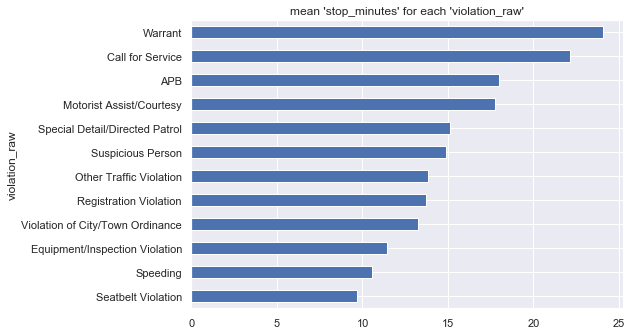

In [37]:
# Plotting stop length

# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby('violation_raw').stop_minutes.mean())

# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')
plt.title("mean 'stop_minutes' for each 'violation_raw'")

# Display the plot
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()


# Chapter 4 - Analyzing the effect of weather on policing

#### Exercício 1 - Exploring the weather dataset

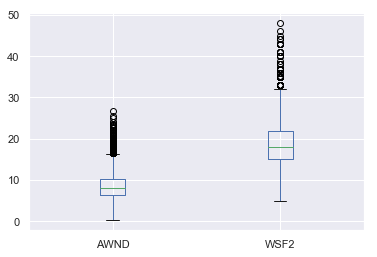

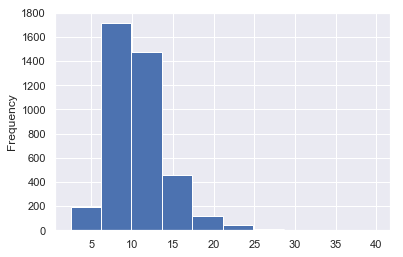

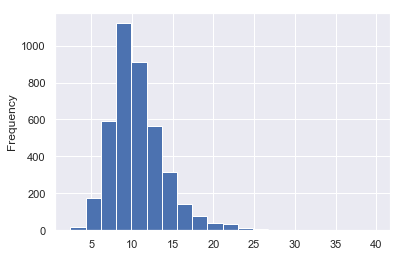

In [38]:
#vídeo

weather = pd.read_csv(data_folder + 'weather.csv')
weather.head()

# TAVG, TMIN, TMAX: Temperature
# AWND, WSF2: Wind speed
# WT01 ... WT22: Bad weather conditions

# Examining wind speed
weather[['AWND', 'WSF2']].head()
weather[['AWND', 'WSF2']].describe()

# Creating a box plot
weather[['AWND', 'WSF2']].plot(kind='box')
plt.show()

# Creating a histogram
weather['WDIFF'] = weather.WSF2 - weather.AWND
weather.WDIFF.plot(kind='hist')
plt.show()

weather.WDIFF.plot(kind='hist', bins=20)
plt.show()

Exercício 2

              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


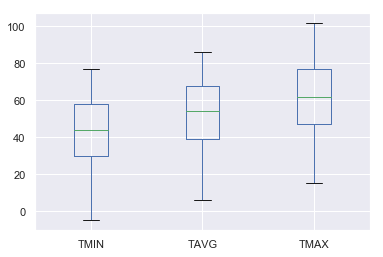

In [39]:
# Plotting the temperature

# Describe the temperature columns
print(weather[['TMIN', 'TAVG', 'TMAX']].describe())

# Create a box plot of the temperature columns
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind='box')

# Display the plot
plt.show()


Exercício 3

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


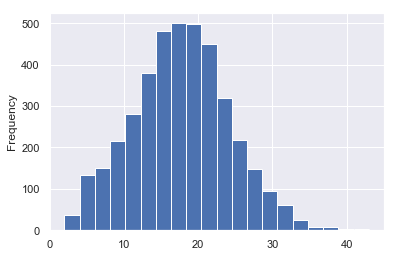

In [40]:
# Plotting the temperature difference

# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF'] = weather.TMAX - weather.TMIN

# Describe the 'TDIFF' column
print(weather['TDIFF'].describe())

# Create a histogram with 20 bins to visualize 'TDIFF'
weather['TDIFF'].plot(kind='hist', bins=20)

# Display the plot
plt.show()

#### Exercício 4 - Categorizing the weather

In [41]:
#vídeo

# Selecting a DataFrame slice
weather.shape
weather.columns

temp = weather.loc[:, 'TAVG':'TMAX']
temp.shape
temp.columns

# DataFrame operations
temp.head()
temp.sum()
temp.sum(axis='columns').head()

# Mapping one set of values to another
ri.stop_duration.unique()
mapping = {'0-15 Min':'short', '16-30 Min':'medium', '30+ Min':'long'}

ri['stop_length'] = ri.stop_duration.map(mapping)

ri.stop_length.dtype

# Changing data type from object to category
ri.stop_length.unique()

# --> Category type stores the data more efficiently
#     Allows you to specify a logical order for the categories

ri.stop_length.memory_usage(deep=True)

cats = ['short', 'medium', 'long']

ri['stop_length'] = ri.stop_length.astype('category', ordered=True, categories=cats)


# Using ordered categories
ri.stop_length.head()
ri[ri.stop_length > 'short'].shape
ri.groupby('stop_length').is_arrested.mean()


C:\Users\Admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


stop_length
short     0.013654
medium    0.093595
long      0.261572
Name: is_arrested, dtype: float64

Exercício 5

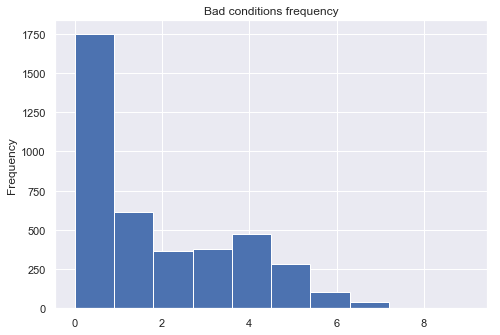

,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


In [42]:
# Counting bad weather conditions

# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:, 'WT01':'WT22']

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis='columns')

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
weather['bad_conditions'].plot(kind='hist')
plt.title("Bad conditions frequency")

# Display the plot
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

WT.head()

Exercício 6

In [43]:
# Rating the weather conditions

# Count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index(), "\n")

# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather['rating'].value_counts())


0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64 

bad      1836
good     1749
worse     432
Name: rating, dtype: int64


Exercício 7

In [44]:
# Changing the data type to category

# Create a list of weather ratings in logical order
cats = ['good', 'bad', 'worse']

# Change the data type of 'rating' to category
weather['rating'] = weather.rating.astype('category', ordered=True, categories=cats)

# Examine the head of 'rating'
weather['rating'].head()

C:\Users\Admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): [good < bad < worse]

#### Exercício 8 - Merging datasets

In [45]:
%%script false
#vídeo

# Preparing the first DataFrame
apple
apple.reset_index(inplace=True)

# Preparing the second DataFrame
high_low
high = high_low[['DATE', 'HIGH']]
high

# Merging the DataFrames
apple_high = pd.merge(left=apple, right=high, left_on='date', right_on='DATE', how='left')

# left=apple: Left DataFrame
# right=high: Right DataFrame
# left_on='date': Key column in left DataFrame
# right_on='DATE': Key column in right DataFrame
# how='left': Type of join

apple_high
apple
high

# Setting the index
apple_high.set_index('date_and_time', inplace=True)
apple_high

Couldn't find program: 'false'


Exercício 9

In [46]:
# Preparing the DataFrames

# Reset the index of 'ri'
ri.reset_index(inplace=True)

# Examine the head of 'ri'
ri.head()

,stop_datetime,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,inventory,frisk,stop_minutes,stop_length
0,2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,False,8,short
1,2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,False,8,short
2,2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,False,8,short
3,2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,False,False,23,medium
4,2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,False,False,8,short


In [47]:
# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE', 'rating']]

# Examine the head of 'weather_rating'
weather_rating.head()

,DATE,rating
0,2005-01-01,bad
1,2005-01-02,bad
2,2005-01-03,bad
3,2005-01-04,bad
4,2005-01-05,bad


Exercício 10

In [48]:
# Merging the DataFrames

# Examine the shape of 'ri'
print(ri.shape)

# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

# Examine the shape of 'ri_weather'
print(ri_weather.shape)

# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_datetime', inplace=True)
ri_weather.head()

(86536, 18)
(86536, 20)


,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,inventory,frisk,stop_minutes,stop_length,DATE,rating
stop_datetime,,,,,,,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,False,8,short,2005-01-04,bad
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,False,8,short,2005-01-23,worse
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,False,8,short,2005-02-17,good
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,False,False,23,medium,2005-02-20,bad
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,False,False,8,short,2005-02-24,bad


#### Exercício 11 - Does weather affect the arrest rate?

In [49]:
#vídeo

# Driver gender and vehicle searches
ri.search_conducted.mean()
ri.groupby('driver_gender').search_conducted.mean()
ri.groupby(['violation', 'driver_gender']).search_conducted.mean()

# Examining a multi-indexed Series
search_rate = ri.groupby(['violation', 'driver_gender']).search_conducted.mean()
type(search_rate)
print(type(search_rate.index))

# Working with a multi-indexed Series
search_rate
search_rate.loc['Equipment']
search_rate.loc['Equipment', 'M']

# Converting a multi-indexed Series to a DataFrame
search_rate.unstack()
print(type(search_rate.unstack()))

ri.pivot_table(index='violation', columns='driver_gender', values='search_conducted')


<class 'pandas.core.indexes.multi.MultiIndex'>
<class 'pandas.core.frame.DataFrame'>


driver_gender,F,M
violation,,
Equipment,0.039984,0.071496
Moving violation,0.039257,0.061524
Other,0.041018,0.046191
Registration/plates,0.054924,0.108802
Seat belt,0.017301,0.035119
Speeding,0.008309,0.027885


Exercício 12

In [50]:
# Comparing arrest rates by weather rating

# Calculate the overall arrest rate
print(ri_weather.is_arrested.mean(), "\n")

# Calculate the overall arrest rate
print(ri_weather.groupby('rating').is_arrested.mean(), "\n")

# Calculate the arrest rate for each 'violation' and 'rating'
print(ri_weather.groupby(['violation','rating']).is_arrested.mean())

print("""\nThe arrest rate increases as the weather gets worse, and that trend persists across many of the violation types. 
This doesn't prove a causal link, but it's quite an interesting result""")

0.0355690117407784 

rating
good     0.033715
bad      0.036261
worse    0.041667
Name: is_arrested, dtype: float64 

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64

The arrest rate increases as the weather gets worse, and that trend persists across many of the vio

Exercício 13

In [51]:
# Selecting from a multi-indexed Series

# Save the output of the groupby operation from the last exercise
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

# Print the 'arrest_rate' Series
print(arrest_rate, "\n")

# Print the arrest rate for moving violations in bad weather
print(arrest_rate.loc['Moving violation', 'bad'], "\n")

# Print the arrest rates for speeding violations in all three weather conditions
print(arrest_rate.loc['Speeding'])


violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64 

0.05804964058049641 

rating
good     0.013405
bad      0.013314
worse    0.016886
Name: is_arrested, dtype: float64


Exercício 14

In [52]:
# Reshaping the arrest rate data

# Unstack the 'arrest_rate' Series into a DataFrame
print(arrest_rate.unstack(), "\n")

# Create the same DataFrame using a pivot table
print(ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested'))


rating                   good       bad     worse
violation                                        
Equipment            0.059007  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076966  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013405  0.013314  0.016886 

rating                   good       bad     worse
violation                                        
Equipment            0.059007  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076966  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013405  0.013314  0.016886


#### Exercício 15 - end

In [53]:
#vídeo

# Fim